In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

def annotate_bar_plot(barplot, fontsize=12, num_type=float):
    for bar in barplot.patches:
        position = (bar.get_x() + bar.get_width() / 2, bar.get_height())
        if num_type == float:
            text = f'{bar.get_height():.2f}'
        elif num_type == 'perc':
            text = f'{bar.get_height():.2f}%'
        else:
            text = f'{bar.get_height():g}'
        barplot.annotate(text=text, xy=position, ha='center', va='center',
                         size=fontsize, xytext=(0, 8), textcoords='offset points')

        
palette = sns.color_palette('Set2')
palette_9 = sns.color_palette("Paired", 9)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = pd.read_csv(r'food-allergy-analysis-Zenodo.csv')
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


# Data Cleaning

First we'll remove the category tags that aren't needed for similarly structured columns.

In [7]:
def process_string(data, column, pattern, replacement):
        return data[column].str.replace(pattern, replacement, regex=True)

columns = list(df.columns)[2:6]

for col in columns:
    df[col] = process_string(df, col, '\w\d - ', '')
    
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,Female,Black,Non-Hispanic,Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,Female,White,Non-Hispanic,Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,Male,White,Hispanic,Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,Male,Unknown,Hispanic,Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,Female,Black,Non-Hispanic,Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For good measure let's inspect our values for each column and ensure we didn't alter them in unwanted or unexpected ways.

In [8]:
df['GENDER_FACTOR'].value_counts()

Male      169032
Female    164168
Name: GENDER_FACTOR, dtype: int64

In [9]:
df['RACE_FACTOR'].value_counts()

White                        183308
Black                         97795
Unknown                       40940
Asian or Pacific Islander      9152
Other                          2005
Name: RACE_FACTOR, dtype: int64

In [10]:
df['ETHNICITY_FACTOR'].value_counts()

Non-Hispanic    317868
Hispanic         15332
Name: ETHNICITY_FACTOR, dtype: int64

In [11]:
df['PAYER_FACTOR'].value_counts()

Non-Medicaid    246340
Medicaid         86860
Name: PAYER_FACTOR, dtype: int64

Before we do any EDA, I'd like to process our data to help potentially provide more insight. Particularly, I'd like to:
- Calculate the study duration for each patient
- Convert allergy data type to floats
- Calculate deltas for treatment data per allergy

In [12]:
# Grab the column names and process them into a list of allergies we can iterate through
allergy_columns = list(df.columns)[9:-9]
allergies = list(set([allergy.split('_')[0] for allergy in allergy_columns]))

# Calculate deltas and convert them to float values
def process_allergy_deltas(df, allergy_name):
    return df[allergy_name + '_ALG_START'].astype(float) - df[allergy_name + '_ALG_END'].astype(float)

# Adding allergy deltas for all treatments
for allergy in allergies:
    df[allergy + "_DELTA"] = process_allergy_deltas(df, allergy)

# Manually add in Atopic Derm as it doesnt fit the same pattern as all the others.
df['ATOPIC_DERM_DELTA'] = df['ATOPIC_DERM_START'].astype(float) - df['ATOPIC_DERM_END'].astype(float)
    
# Adding the study duration per patient to our data
df['STUDY_DURATION_YEARS'] = df['AGE_END_YEARS'].astype(float) - df['AGE_START_YEARS'].astype(float)

# Visualize demographic data

[Text(0.5, 1.0, 'Demographics by Race/Payer Factor')]

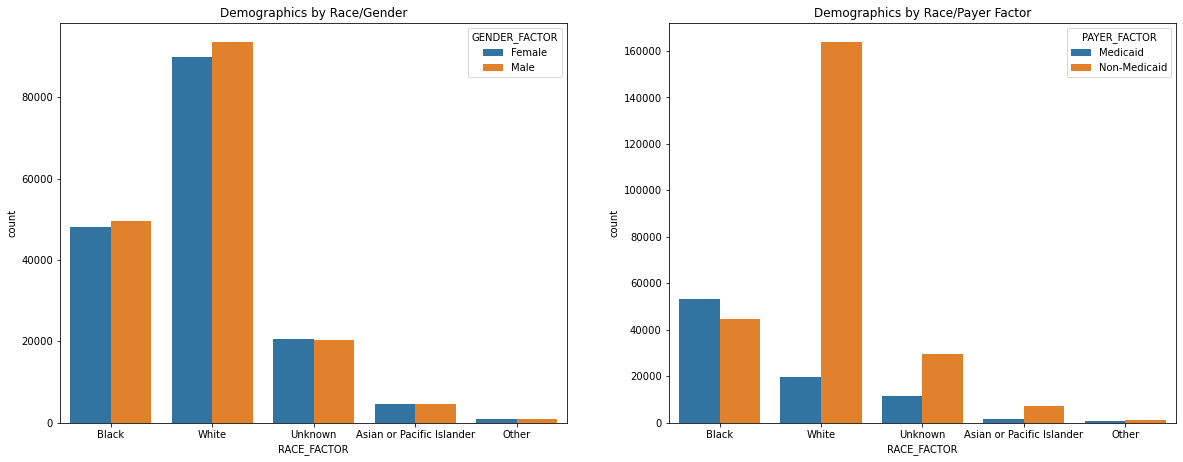

In [13]:
plt.figure(figsize=(20, 25))

plt.subplot(321)
sns.countplot(data=df, x="RACE_FACTOR", hue='GENDER_FACTOR').set(title='Demographics by Race/Gender')
plt.subplot(322)
sns.countplot(data=df, x="RACE_FACTOR", hue='PAYER_FACTOR').set(title='Demographics by Race/Payer Factor')

# Allergy Prevalence Deltas Visualization by Gender

In [14]:
def show_delta_plot(condition_name, hue_factor):
    data_new = df[df[condition_name + '_DELTA'] != 0].loc[:,[hue_factor,'STUDY_DURATION_YEARS', condition_name + '_DELTA']].dropna()
    sns.scatterplot(data = data_new, x = condition_name + '_DELTA', y = 'STUDY_DURATION_YEARS', hue = hue_factor).set(title = condition_name + ' Delta Over Time')

First we will visualize each allergy delta over time with gender being represented for each patient

[Text(0.5, 1.0, 'ATOPIC_DERM Delta Over Time')]

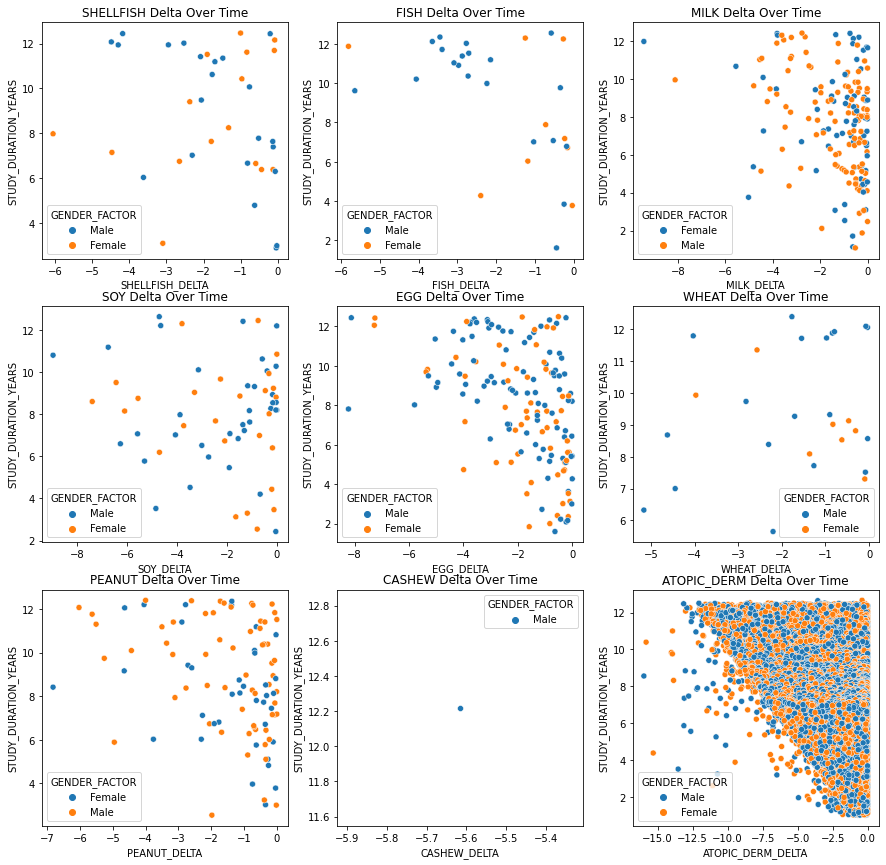

In [15]:
plt.figure(figsize = (15, 20))

plt.subplot(431)
show_delta_plot('SHELLFISH', 'GENDER_FACTOR')

plt.subplot(432)
show_delta_plot('FISH','GENDER_FACTOR')

plt.subplot(433)
show_delta_plot('MILK', 'GENDER_FACTOR')

plt.subplot(434)
show_delta_plot('SOY','GENDER_FACTOR')

plt.subplot(435)
show_delta_plot('EGG','GENDER_FACTOR')

plt.subplot(436)
show_delta_plot('WHEAT','GENDER_FACTOR')

plt.subplot(437)
show_delta_plot('PEANUT','GENDER_FACTOR')

plt.subplot(438)
show_delta_plot('CASHEW','GENDER_FACTOR')

# Remove a few outliers from atopic derm to make graph easier to see
plt.subplot(439)
data_atopic = df[df['ATOPIC_DERM_DELTA'] != 0].loc[:,['GENDER_FACTOR','STUDY_DURATION_YEARS', 'ATOPIC_DERM_DELTA']].dropna()
data_atopic = data_atopic[data_atopic['ATOPIC_DERM_DELTA'] > -40]
sns.scatterplot(data = data_atopic, x = 'ATOPIC_DERM_DELTA', y = 'STUDY_DURATION_YEARS', hue = 'GENDER_FACTOR').set(title = 'ATOPIC_DERM Delta Over Time')

**Treenut, walnut, pecan, pistachio, almond, hazelnut, and brazil nut data contained no non-zero deltas and thus are not represented in the graphs above.**

___

# Allergy Prevalence Deltas Visualization by Race Demographic

[Text(0.5, 1.0, 'ATOPIC_DERM Delta Over Time')]

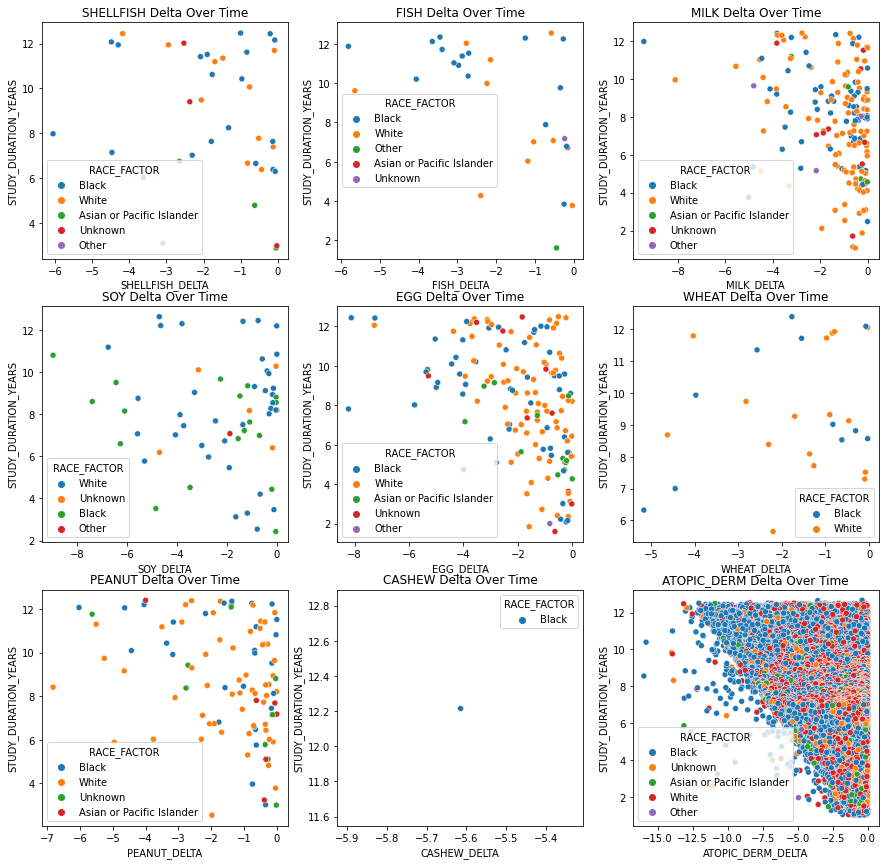

In [16]:
plt.figure(figsize = (15, 20))

plt.subplot(431)
show_delta_plot('SHELLFISH', 'RACE_FACTOR')

plt.subplot(432)
show_delta_plot('FISH','RACE_FACTOR')

plt.subplot(433)
show_delta_plot('MILK', 'RACE_FACTOR')

plt.subplot(434)
show_delta_plot('SOY','RACE_FACTOR')

plt.subplot(435)
show_delta_plot('EGG','RACE_FACTOR')

plt.subplot(436)
show_delta_plot('WHEAT','RACE_FACTOR')

plt.subplot(437)
show_delta_plot('PEANUT','RACE_FACTOR')

plt.subplot(438)
show_delta_plot('CASHEW','RACE_FACTOR')

# Remove a few outliers from atopic derm to make graph easier to see
plt.subplot(439)
data_atopic = df[df['ATOPIC_DERM_DELTA'] != 0].loc[:,['RACE_FACTOR','STUDY_DURATION_YEARS', 'ATOPIC_DERM_DELTA']].dropna()
data_atopic = data_atopic[data_atopic['ATOPIC_DERM_DELTA'] > -40]
sns.scatterplot(data = data_atopic, x = 'ATOPIC_DERM_DELTA', y = 'STUDY_DURATION_YEARS', hue = 'RACE_FACTOR').set(title = 'ATOPIC_DERM Delta Over Time')

In [18]:
df = df.query('AGE_START_YEARS >= 0')

print('START AGE:')
print('- Youngest:', df['AGE_START_YEARS'].min(), 'years old')
print('- Oldest:', df['AGE_START_YEARS'].max(), 'years old')
print('\nEND AGE:')
print('- Youngest:', df['AGE_END_YEARS'].min(), 'years old')
print('- Oldest:', df['AGE_END_YEARS'].max(), 'years old')
print('\nDURATION:')
print('- Shortest:', (df['AGE_END_YEARS'] - df['AGE_START_YEARS']).min(), 'years')
print('- Longest:', (df['AGE_END_YEARS'] - df['AGE_START_YEARS']).max(), 'years')

START AGE:
- Youngest: 0.0 years old
- Oldest: 17.9849418206708 years old

END AGE:
- Youngest: 1.00205338809035 years old
- Oldest: 18.9979466119097 years old

DURATION:
- Shortest: 1.0020533880902995 years
- Longest: 12.98288843258045 years


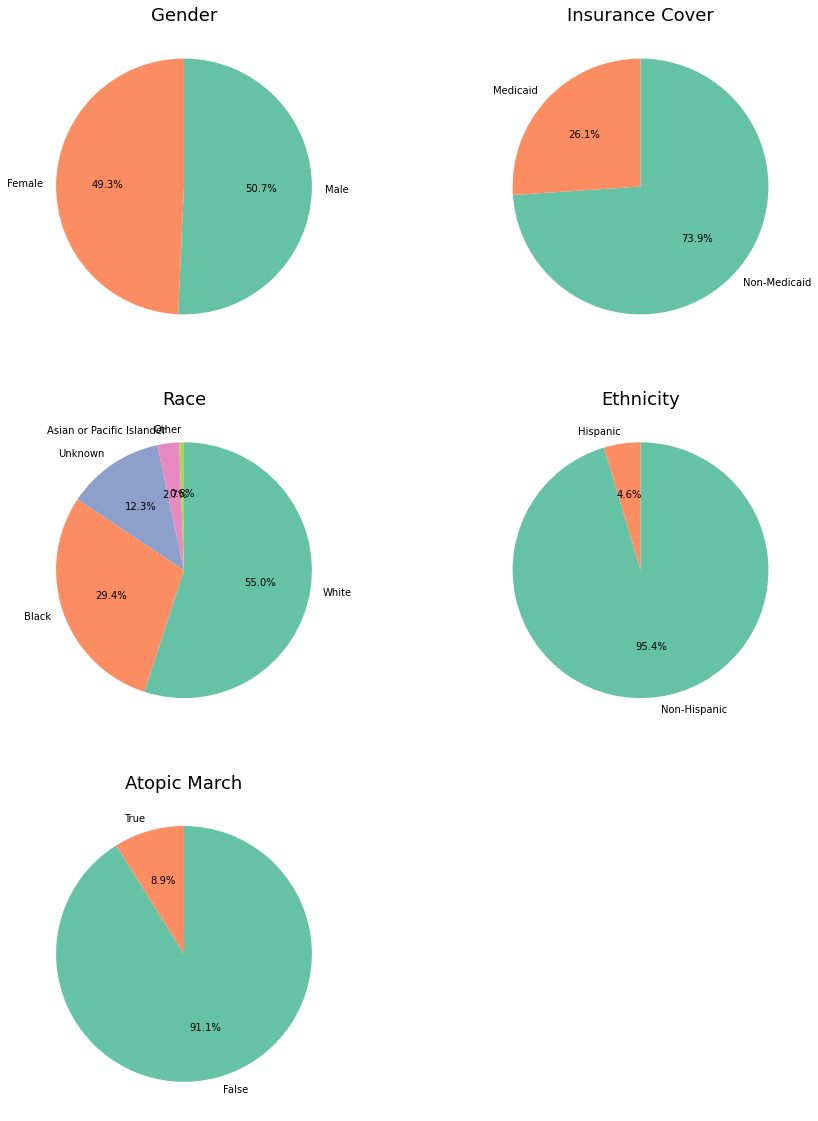

In [19]:
plt.figure(figsize=(15, 20))

plt.subplot(321)
data = df['GENDER_FACTOR'].value_counts()
plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
plt.title('Gender', fontsize=18)

plt.subplot(322)
data = df['PAYER_FACTOR'].value_counts()
plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
plt.title('Insurance Cover', fontsize=18)

plt.subplot(323)
data = df['RACE_FACTOR'].value_counts()
plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
plt.title('Race', fontsize=18)

plt.subplot(324)
data = df['ETHNICITY_FACTOR'].value_counts()
plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
plt.title('Ethnicity', fontsize=18)

plt.subplot(325)
data = df['ATOPIC_MARCH_COHORT'].value_counts()
plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
plt.title('Atopic March', fontsize=18)

plt.show()

# Allergy occurrences


In [21]:
allergy_cols = [x for x in df.columns if x.endswith('START') or x.endswith('END')]
allergy_names = [' '.join(x.split('_')[:-1]) for x in allergy_cols]
allergy_names = sorted(list(set(allergy_names)))
print(f'There are {len(allergy_names)} types of allergies in this study:\n\t-', '\n\t- '.join(allergy_names))

There are 19 types of allergies in this study:
	- ALLERGIC RHINITIS
	- ALMOND ALG
	- ASTHMA
	- ATOPIC DERM
	- BRAZIL ALG
	- CASHEW ALG
	- EGG ALG
	- FISH ALG
	- HAZELNUT ALG
	- MILK ALG
	- PEANUT ALG
	- PECAN ALG
	- PISTACH ALG
	- SESAME ALG
	- SHELLFISH ALG
	- SOY ALG
	- TREENUT ALG
	- WALNUT ALG
	- WHEAT ALG


In [22]:
def find_allergy_names(row):
    names = [allergy_cols[x] for x in range(len(allergy_cols)) if not np.isnan(row[x])]
    names = [' '.join(x.split('_')[:-1]) for x in names]
    return list(set(names))

In [23]:
has_allergy = df[['SUBJECT_ID']]
has_allergy['allergies'] = df[allergy_cols].apply(
    lambda r: find_allergy_names(row=r), axis=1)
has_allergy = has_allergy.explode('allergies')
has_allergy = pd.concat([has_allergy, pd.get_dummies(has_allergy['allergies'])], axis=1)
has_allergy = has_allergy.drop(columns='allergies').groupby('SUBJECT_ID').sum().reset_index()

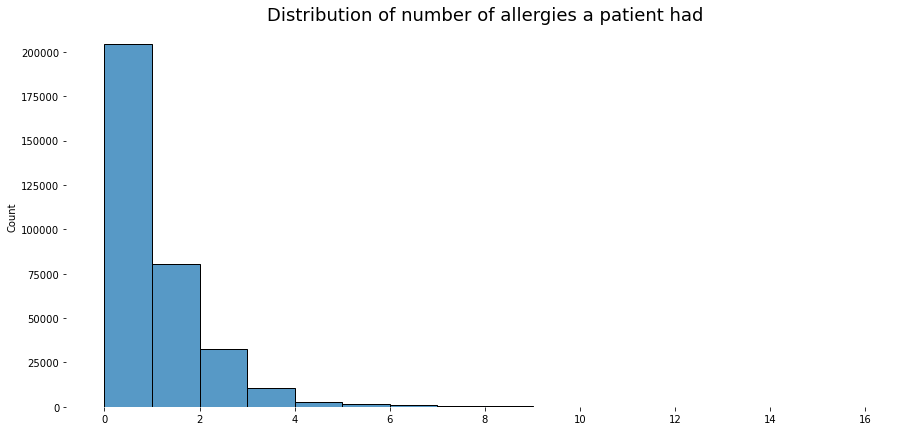

In [24]:
data = has_allergy.drop(columns='SUBJECT_ID').sum(axis=1)

plt.figure(figsize=(15, 7))
sns.histplot(data, binwidth=1)
plt.box(False)
plt.title('Distribution of number of allergies a patient had', fontsize=18)
plt.show()

In [25]:
allergy_summary = has_allergy.drop(columns=['SUBJECT_ID'])
allergy_summary = allergy_summary.sum().sort_values(ascending=False).reset_index()
allergy_summary.columns = ['Allergy', 'Count']

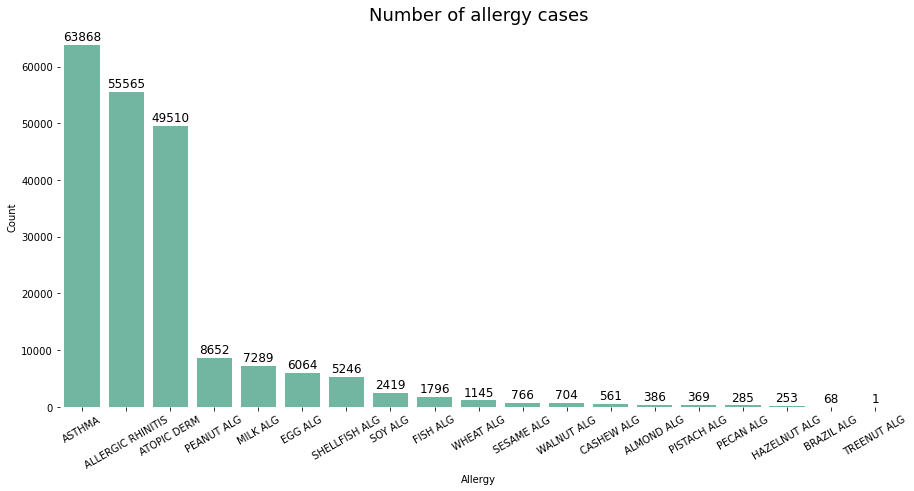

In [26]:
plt.figure(figsize=(15, 7))
bp = sns.barplot(x='Allergy', y='Count', data=allergy_summary, color=palette[0])
annotate_bar_plot(barplot=bp, num_type=int)
plt.xticks(rotation=30)
plt.title('Number of allergy cases', fontsize=18)
plt.box(False)
plt.show()

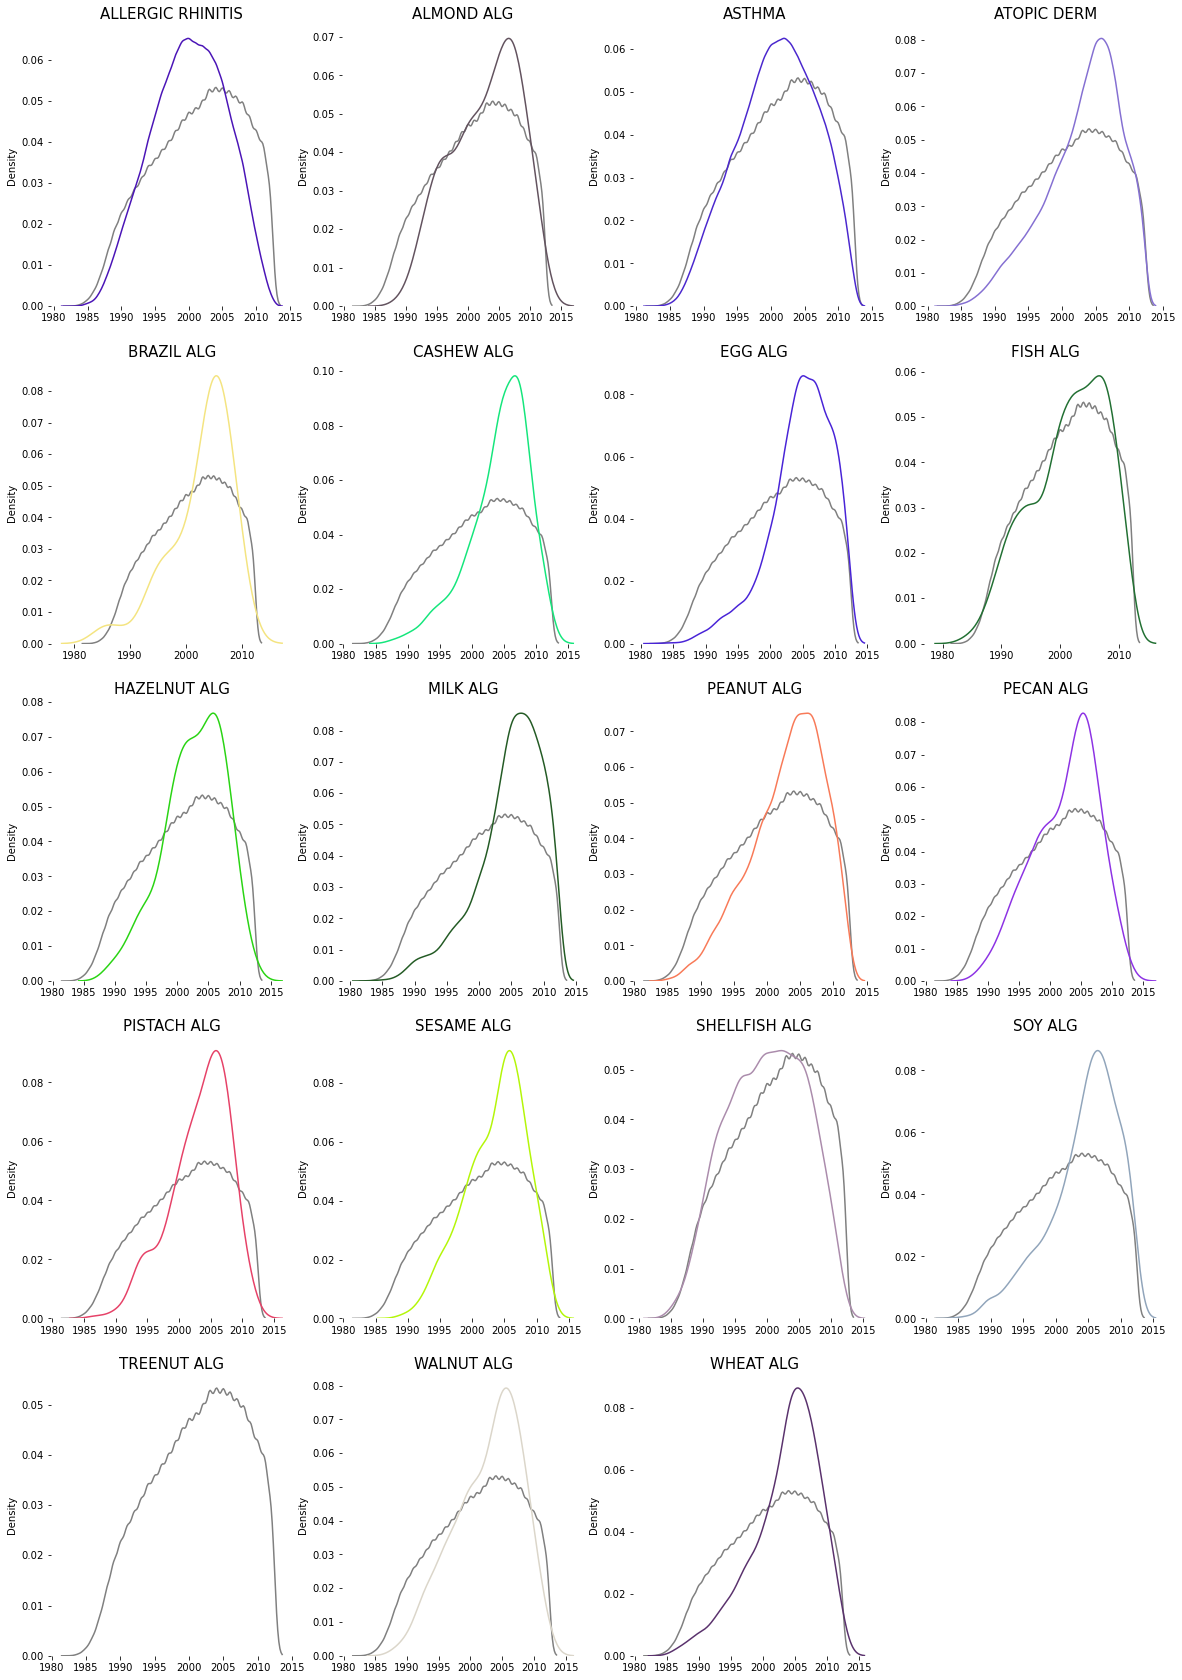

In [27]:
allergy_birth_year = has_allergy.merge(df[['SUBJECT_ID', 'BIRTH_YEAR']], how='left', on='SUBJECT_ID')
allergy_birth_year['HAS_ALLERGY'] = allergy_birth_year.drop(columns=['SUBJECT_ID', 'BIRTH_YEAR']).sum(axis=1)
allergy_birth_year['HAS_ALLERGY'] = (allergy_birth_year['HAS_ALLERGY'] > 0).astype(int)

plt.figure(figsize=(20, 30))

for index, name in enumerate(allergy_names):
    plt.subplot(5, 4, index + 1)
    sns.kdeplot(allergy_birth_year['BIRTH_YEAR'], label=name, color='grey')
    sub_df = allergy_birth_year.query(f'`{name}` != 0')['BIRTH_YEAR']
    color = (np.random.random(), np.random.random(), np.random.random())
    sns.kdeplot(sub_df, label=name, color=color)
    plt.xlabel('')
    plt.title(name, fontsize=15)
    plt.box(False)

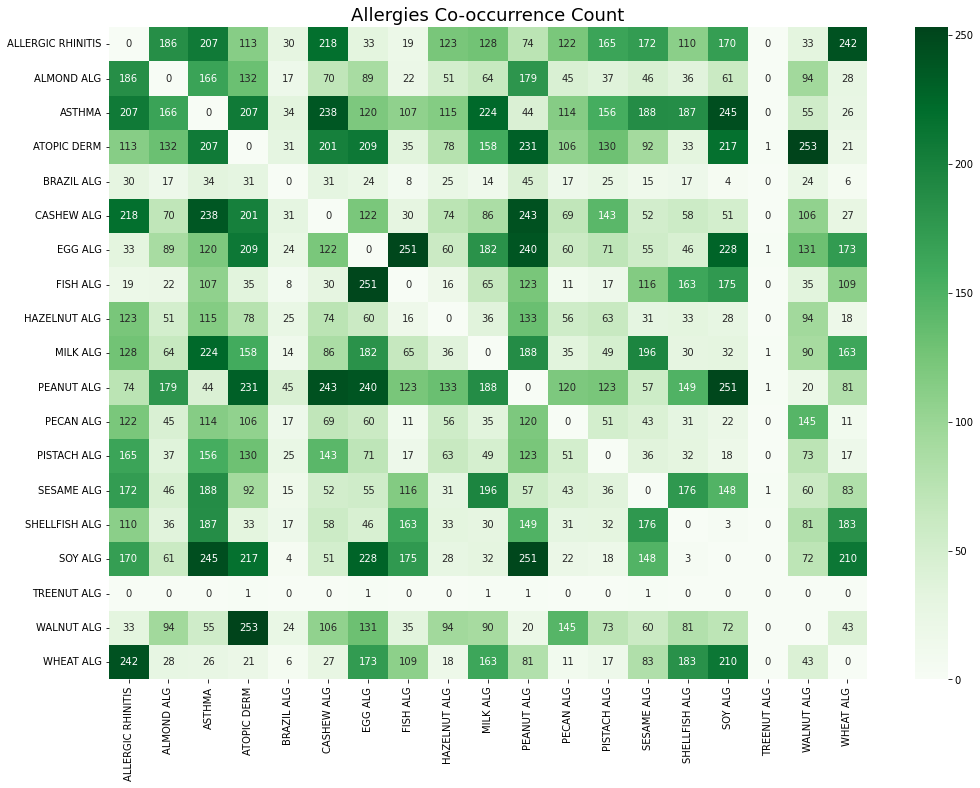

In [28]:
cooc_count = has_allergy.drop(columns='SUBJECT_ID')
cooc_count = cooc_count.T.dot(cooc_count)
cooc_count.values[[np.arange(cooc_count.shape[0])]*2] = 0

plt.figure(figsize=(17, 12))
sns.heatmap(cooc_count, annot=True, fmt='d', cmap='Greens')
plt.title('Allergies Co-occurrence Count', fontsize=18)
plt.show()

reading the following plot: e.g ALMOND ALG row, first cell whose value is 48.2 -> of all almond allergy cases, there are 48.2% where the patient also had allergic rhinitis.

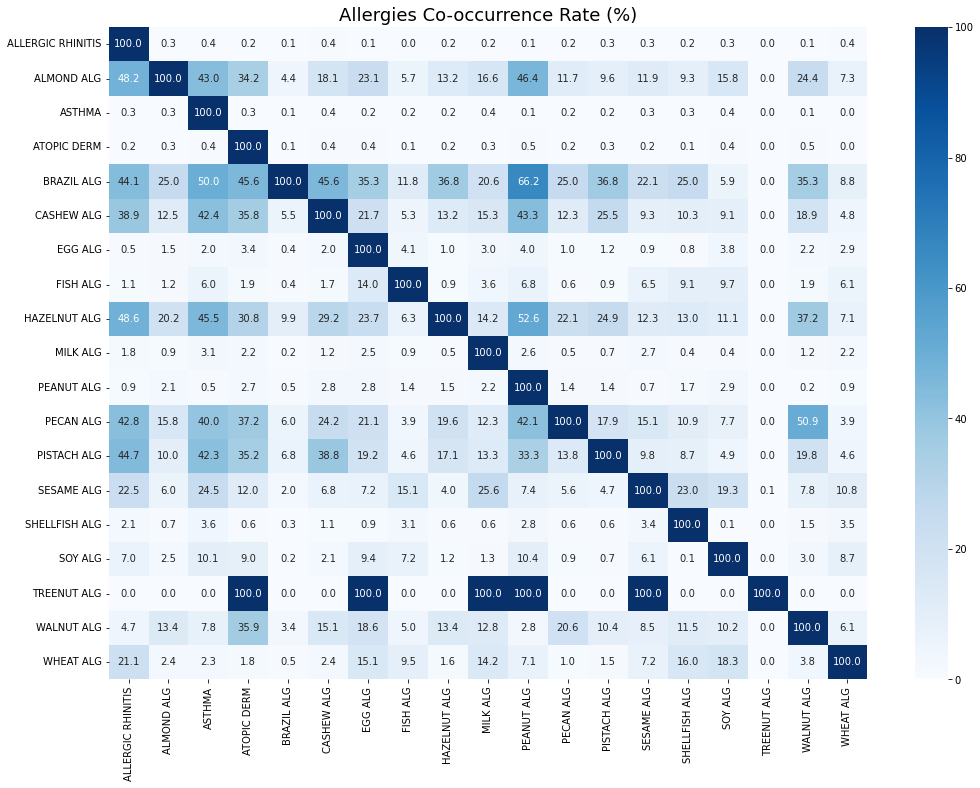

In [29]:
cooc_rate = cooc_count.divide(allergy_summary.sort_values(by='Allergy')['Count'].values, axis=0)
# Fill diagonal line with value 1
cooc_rate.values[[np.arange(cooc_rate.shape[0])] * 2] = 1
cooc_rate = cooc_rate * 100

plt.figure(figsize=(17, 12))
sns.heatmap(cooc_rate, annot=True, fmt='.1f', cmap='Blues')
plt.title('Allergies Co-occurrence Rate (%)', fontsize=18)
plt.show()

In [30]:
status_delta = []

for name in allergy_names:
    print(name)
    name_score = name.replace(' ', '_')
    sub_df = df[['AGE_START_YEARS', 'AGE_END_YEARS', f'{name_score}_START', f'{name_score}_END']].fillna(0)
    sub_df['delta'] = sub_df[f'{name_score}_END'] - sub_df[f'{name_score}_START']
    
    up = sub_df[sub_df['delta'] > 0].shape[0] / len(sub_df) * 100
    down = sub_df[sub_df['delta'] < 0].shape[0] / len(sub_df) * 100
    status_delta.append([name, up, down])
    
status_delta = pd.DataFrame(status_delta, columns=['allergy', 'increase', 'decrease'])

ALLERGIC RHINITIS
ALMOND ALG
ASTHMA
ATOPIC DERM
BRAZIL ALG
CASHEW ALG
EGG ALG
FISH ALG
HAZELNUT ALG
MILK ALG
PEANUT ALG
PECAN ALG
PISTACH ALG
SESAME ALG
SHELLFISH ALG
SOY ALG
TREENUT ALG
WALNUT ALG
WHEAT ALG


In [31]:
exclude_alg = ['BRAZIL ALG', 'TREENUT ALG']

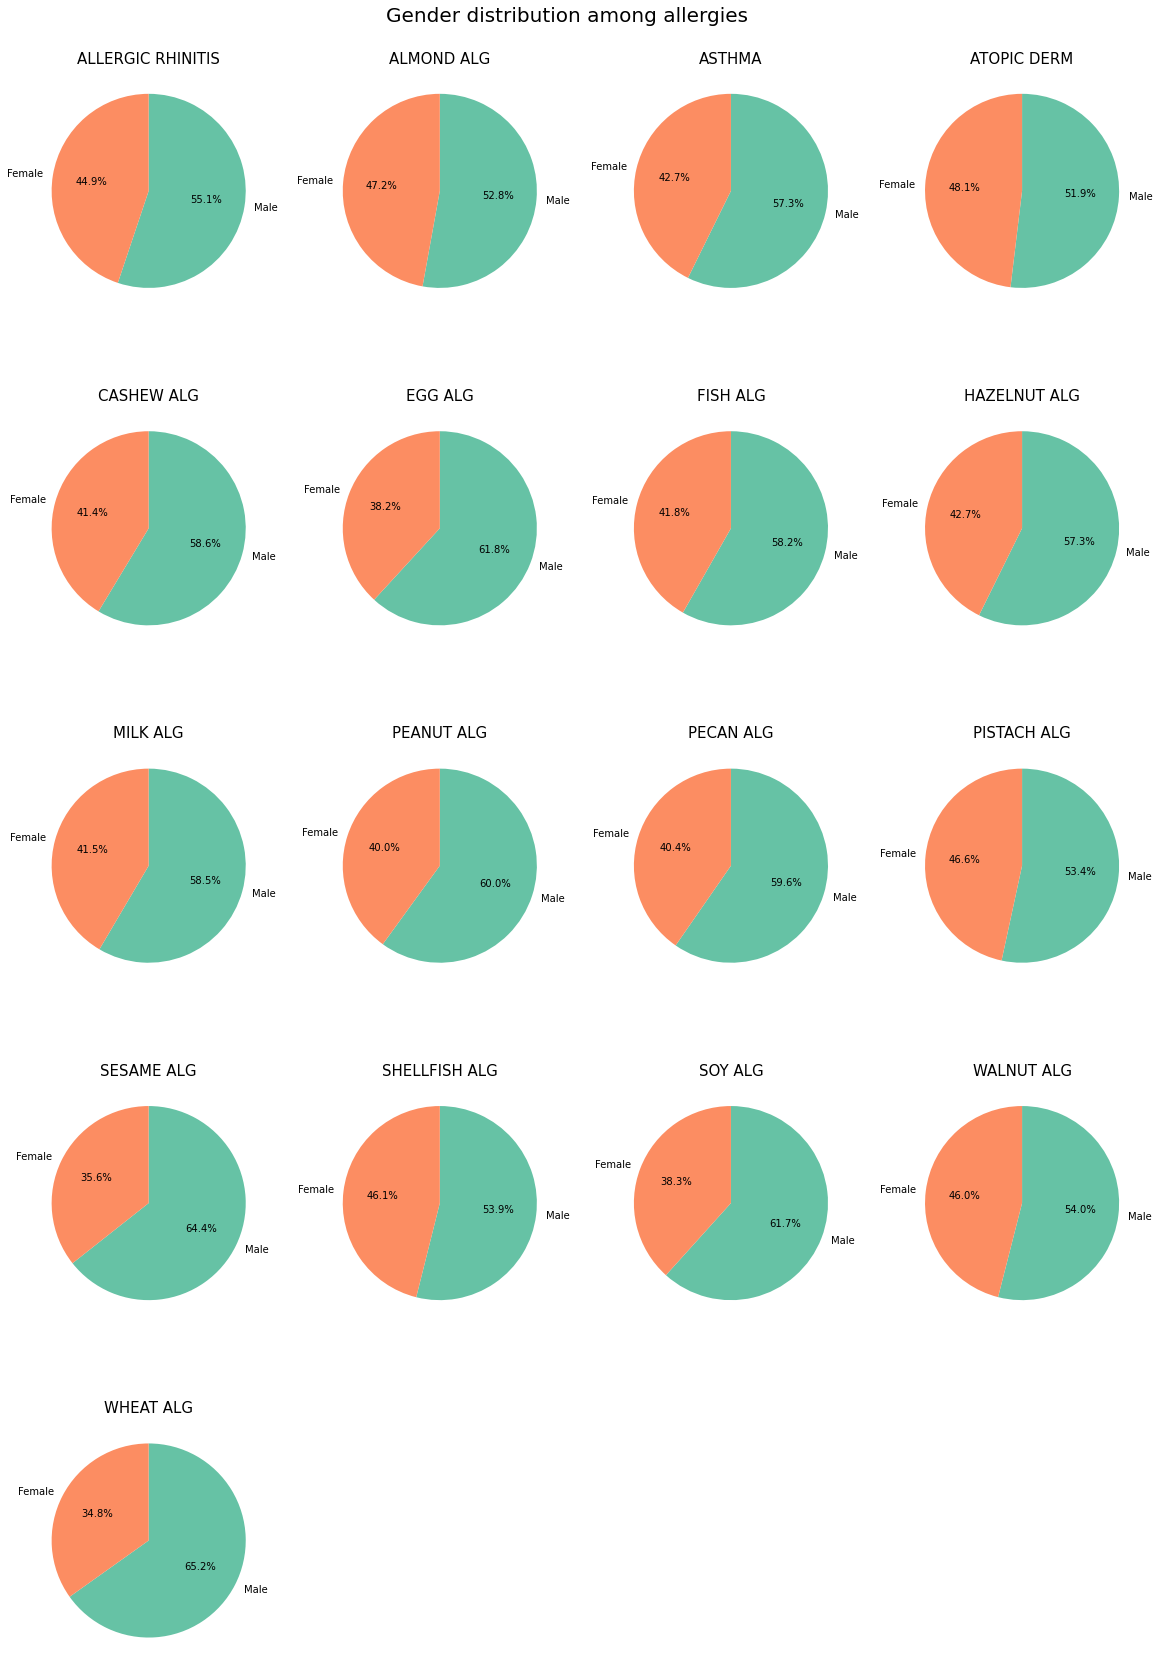

In [32]:
allergy_gender = has_allergy.merge(df[['SUBJECT_ID', 'GENDER_FACTOR']], how='left', on='SUBJECT_ID')
allergy_gender['GENDER_FACTOR'] = allergy_gender['GENDER_FACTOR'].apply(lambda x: x.split('-')[-1].strip())

fig = plt.figure(figsize=(20, 30))
fig.suptitle('Gender distribution among allergies', fontsize=20, y=0.9)

for index, name in enumerate([x for x in allergy_names if x not in exclude_alg]):
    data = allergy_gender.query(f'`{name}` != 0')['GENDER_FACTOR'].value_counts()
    plt.subplot(5, 4, index + 1)
    plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
    plt.title(name, fontsize=15)
    plt.box(False)

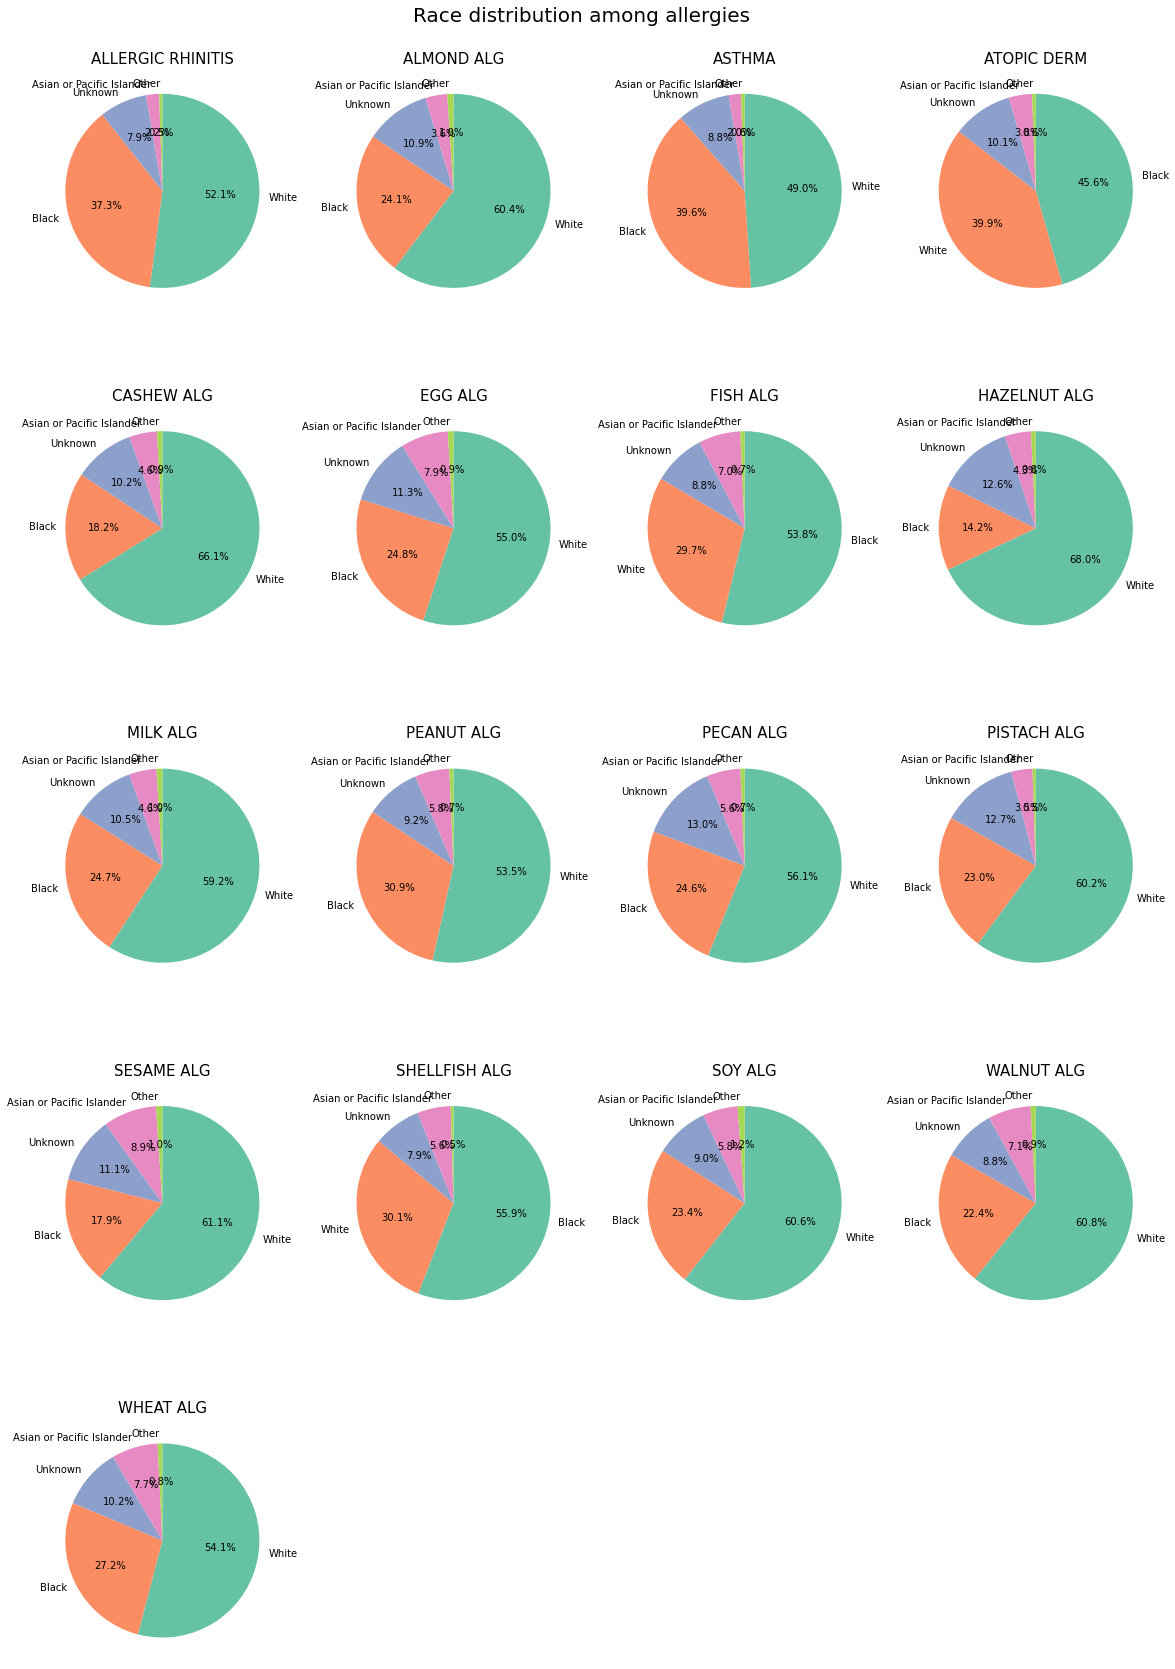

In [33]:
allergy_race = has_allergy.merge(df[['SUBJECT_ID', 'RACE_FACTOR']], how='left', on='SUBJECT_ID')
allergy_race['RACE_FACTOR'] = allergy_race['RACE_FACTOR'].apply(lambda x: x.split('-')[-1].strip())

fig = plt.figure(figsize=(20, 30))
fig.suptitle('Race distribution among allergies', fontsize=20, y=0.9)

for index, name in enumerate([x for x in allergy_names if x not in exclude_alg]):
    data = allergy_race.query(f'`{name}` != 0')['RACE_FACTOR'].value_counts()
    plt.subplot(5, 4, index + 1)
    plt.pie(data, labels=data.index,
        startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
    plt.title(name, fontsize=15)
    plt.box(False)

It is still unclear how to interpret values in allergy columns so I'm gonna leave it there until further clarification.